In [87]:
#import dependencies
import hvplot.pandas 
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os.path
from io import StringIO
import csv



# Import the API key
from config import geoapify_key

import warnings
warnings.filterwarnings("ignore")


In [88]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
olympic_track_data = pd.read_csv("results.csv")

olympic_track_data.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77


In [144]:
# Create dataframe list for stadium locations
locations1 = ["Bordeaux Stadium", "Lyon Stadium", "Marseilles Stadium",
    "Nice Stadium", "Beaujoire Stadium", "Paris Stadium", 
    "Geoffroy Guichard Stadium"]


In [100]:
# Target city
locations = ["Stadium_Vélodrome_de_Bordeaux_Lac,_Cours_Charles_Bricaud,_33300_Bordeaux,_France", "Groupama_Stadium,_Allée_Sud-Ouest,_69150_Décines-Charpieu,_France", "Stade_Vélodrome,_Baly_Plufern,_29233_Cléder,_France",
    "Allianz_Riviera,_Allée_Camille_Muffat,_06284_Nice,_France", "Stade_de_La_Beaujoire_-_Louis_Fonteneau,_Boulevard_Professeur_Jacques_Monod,_44300_Nantes,_France", "Parc_des_Princes,_24_Rue_du_Commandant_Guilbaud,_75016_Paris,_France", 
    "Stade_Geoffroy-Guichard,_14_Rue_Paul_et_Pierre_Guichard,_42000_Saint-Étienne,_France"]


In [103]:
# Create individual url for each location:
url_list = []

url1 = f"https://api.geoapify.com/v1/geocode/autocomplete?text=Stadium_Vélodrome_de_Bordeaux_Lac,_Cours_Charles_Bricaud,_33300_Bordeaux,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218"
url2 = f"https://api.geoapify.com/v1/geocode/autocomplete?text=Groupama_Stadium,_Allée_Sud-Ouest,_69150_Décines-Charpieu,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218"
url3 = f"https://api.geoapify.com/v1/geocode/autocomplete?text=Stade_Vélodrome,_Baly_Plufern,_29233_Cléder,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218"
url4 = f"https://api.geoapify.com/v1/geocode/autocomplete?text=Allianz_Riviera,_Allée_Camille_Muffat,_06284_Nice,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218"
url5 = f"https://api.geoapify.com/v1/geocode/autocomplete?text=Stade_de_La_Beaujoire_-_Louis_Fonteneau,_Boulevard_Professeur_Jacques_Monod,_44300_Nantes,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218"
url6 = f"https://api.geoapify.com/v1/geocode/autocomplete?text=Parc_des_Princes,_24_Rue_du_Commandant_Guilbaud,_75016_Paris,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218"
url7 = f"https://api.geoapify.com/v1/geocode/autocomplete?text=Stade_Geoffroy-Guichard,_14_Rue_Paul_et_Pierre_Guichard,_42000_Saint-Étienne,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218"

# Create a list of these urls
url_list = [url1,url2,url3,url4,url5,url6,url7]
urls = (", ".join(url_list))

# For each url in list, print url:
print(urls)



https://api.geoapify.com/v1/geocode/autocomplete?text=Stadium_Vélodrome_de_Bordeaux_Lac,_Cours_Charles_Bricaud,_33300_Bordeaux,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218, https://api.geoapify.com/v1/geocode/autocomplete?text=Groupama_Stadium,_Allée_Sud-Ouest,_69150_Décines-Charpieu,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218, https://api.geoapify.com/v1/geocode/autocomplete?text=Stade_Vélodrome,_Baly_Plufern,_29233_Cléder,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218, https://api.geoapify.com/v1/geocode/autocomplete?text=Allianz_Riviera,_Allée_Camille_Muffat,_06284_Nice,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218, https://api.geoapify.com/v1/geocode/autocomplete?text=Stade_de_La_Beaujoire_-_Louis_Fonteneau,_Boulevard_Professeur_Jacques_Monod,_44300_Nantes,_France&format=json&apiKey=15ef6c37c8674d18a83898e9b7793218, https://api.geoapify.com/v1/geocode/autocomplete?text=Parc_des_Princes,_24_Rue_du_Commandant_Guilbaud,_75016_P

In [111]:
# Run a request to endpoint and convert result to json
for url in url_list:
    data = requests.get(urls).json()

# Print the json
print(data)

{'statusCode': 401, 'error': 'Unauthorized', 'message': 'Invalid apiKey'}


In [151]:
# Create a list of all data from each location
data_list = []

data1 = requests.get(url1).json()
data2 = requests.get(url2).json()
data3 = requests.get(url3).json()
data4 = requests.get(url4).json()
data5 = requests.get(url5).json()
data6 = requests.get(url6).json()
data7 = requests.get(url7).json()

data_list = [data1,data2,data3,data4,data5,data6,data7]
data = (json.dumps(data_list, indent=4, sort_keys=True))

print(data)

[
    {
        "query": {
            "text": "Stadium_V\u00e9lodrome_de_Bordeaux_Lac,_Cours_Charles_Bricaud,_33300_Bordeaux,_France"
        },
        "results": [
            {
                "address_line1": "Stadium V\u00e9lodrome de Bordeaux Lac",
                "address_line2": "Cours Charles Bricaud, 33300 Bordeaux, France",
                "bbox": {
                    "lat1": 44.8985467,
                    "lat2": 44.8999029,
                    "lon1": -0.5667861,
                    "lon2": -0.5648716
                },
                "category": "sport.stadium",
                "city": "Bordeaux",
                "country": "France",
                "country_code": "fr",
                "county": "Gironde",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "sourcename": "openstreetmap",
                    "url": "https://www.openstreetmap.

In [226]:
# Extract latitude and longitude for each location
lat_list = []
lon_list = []

lat1 = data1['results'][0]['lat']
lon1 = data1['results'][0]['lon']
lat2 = data2['results'][0]['lat']
lon2 = data2['results'][0]['lon']
lat3 = data3['results'][0]['lat']
lon3 = data3['results'][0]['lon']
lat4 = data4['results'][0]['lat']
lon4 = data4['results'][0]['lon']
lat5 = data5['results'][0]['lat']
lon5 = data5['results'][0]['lon']
lat6 = data6['results'][0]['lat']
lon6 = data6['results'][0]['lon']
lat7 = data7['results'][0]['lat']
lon7 = data7['results'][0]['lon']

lat_lon_list = [[locations1[0],lat1,lon1],
                [locations1[1],lat2,lon2], 
                [locations1[2],lat3,lon3],
                [locations1[3],lat4,lon4],
                [locations1[4],lat5,lon5],
                [locations1[5],lat6,lon6],
                [locations1[6],lat7,lon7]]
lat_lon = (json.dumps(lat_lon_list, indent=4, sort_keys=True))

# Print the latitude and longitude
print(lat_lon)

[
    [
        "Bordeaux Stadium",
        44.89922485,
        -0.5658288499999994
    ],
    [
        "Lyon Stadium",
        45.7653624,
        4.9820543110736715
    ],
    [
        "Marseilles Stadium",
        48.6699392,
        -4.105393054072114
    ],
    [
        "Nice Stadium",
        43.705147749999995,
        7.192603345064198
    ],
    [
        "Beaujoire Stadium",
        47.256004950000005,
        -1.524755249963072
    ],
    [
        "Paris Stadium",
        48.841363400000006,
        2.2530693162378235
    ],
    [
        "Geoffroy Guichard Stadium",
        45.46075665,
        4.390093207379497
    ]
]


In [228]:
# Create csv to hold details
import csv

with open('newfile.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Stadium Location","Latitude", "Longitude"])
    writer.writerow(lat_lon_list)

# Clean csv
df = pd.read_csv('newfile.csv')
df.head()

for row in lat_lon_list:
    d1 = {'Stadium Location': [lat_lon_list]}
    df2 = pd.DataFrame(d1)
    print (df2)


                                    Stadium Location
0  [[Bordeaux Stadium, 44.89922485, -0.5658288499...
                                    Stadium Location
0  [[Bordeaux Stadium, 44.89922485, -0.5658288499...
                                    Stadium Location
0  [[Bordeaux Stadium, 44.89922485, -0.5658288499...
                                    Stadium Location
0  [[Bordeaux Stadium, 44.89922485, -0.5658288499...
                                    Stadium Location
0  [[Bordeaux Stadium, 44.89922485, -0.5658288499...
                                    Stadium Location
0  [[Bordeaux Stadium, 44.89922485, -0.5658288499...
                                    Stadium Location
0  [[Bordeaux Stadium, 44.89922485, -0.5658288499...


In [239]:
# Read csv file
df = pd.read_csv('olympic_stadiumlocations.csv')
df.head()

import plotly.express as px
lat = []
lon = []



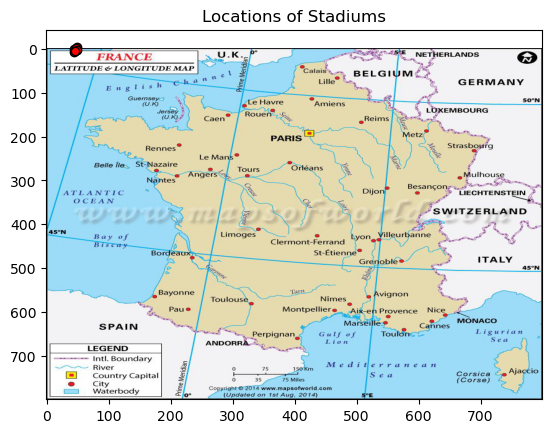

In [280]:
# Create axes for plotting into scatterplot for mapping purposes
x_axis = df["Latitude "]
y_axis = df["Longitude"]
x_min = 55
y_max = 8
y_min = -4
img = plt.imread("francemap.jpeg")
ext = [0.0, 10.0, 0.00, 1.25]
plt.imshow(img, zorder=0, aspect='auto')
plt.title("Locations of Stadiums")
plt.scatter(x_axis,y_axis,marker="o", facecolors="red", edgecolors="black")
plt.show()

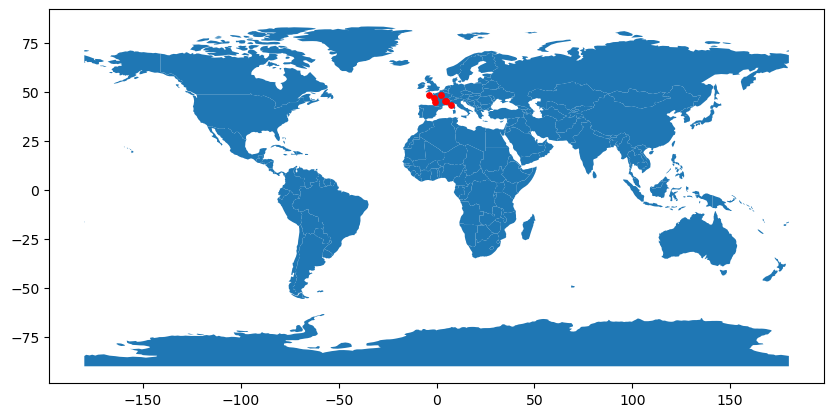

In [293]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_csv("olympic_stadiumlocations.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(y_axis, x_axis)]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [294]:
# Now do the same to get the map data on French map
df = pd.read_csv("olympic_stadiumlocations.csv", delimiter=',', skiprows=0, low_memory=False)

gpd.read_file("fr_100km.shp")

geometry = [Point(xy) for xy in zip(y_axis, x_axis)]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
france = gpd.read_file()
gdf.plot(ax=france.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

DriverError: fr_100km.shp: No such file or directory